In [14]:
import warnings
from sklearn.metrics import accuracy_score
import ssl
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.datasets import cifar10
from keras.models import Sequential
from tensorflow import keras
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

ssl._create_default_https_context = ssl._create_unverified_context
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Physical devices cannot be modified after being initialized


In [15]:
# Normalizing
X_train = X_train/255
X_test = X_test/255

# One-Hot-Encoding
Y_train_en = to_categorical(Y_train, 10)
Y_test_en = to_categorical(Y_test, 10)


model = Sequential()
model.add(Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 29, 29, 64)        3136      
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 128)       131200    
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 128)         262272    
                                                      

In [16]:

history = model.fit(X_train, Y_train_en, epochs=50,
                      verbose=1, validation_data=(X_test, Y_test_en))

Epoch 1/50
1563/1563 [==============================] - 41s 26ms/step - loss: 1.7528 - accuracy: 0.3430 - val_loss: 1.4652 - val_accuracy: 0.4689
Epoch 2/50
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4437 - accuracy: 0.4767 - val_loss: 1.3248 - val_accuracy: 0.5233
Epoch 3/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3191 - accuracy: 0.5271 - val_loss: 1.2111 - val_accuracy: 0.5634
Epoch 4/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2381 - accuracy: 0.5591 - val_loss: 1.2054 - val_accuracy: 0.5844
Epoch 5/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1723 - accuracy: 0.5814 - val_loss: 1.0929 - val_accuracy: 0.6099
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1183 - accuracy: 0.6061 - val_loss: 1.1035 - val_accuracy: 0.6127
Epoch 7/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0756 - accuracy: 0.6230 - val_loss: 1.0064 -

313/313 - 2s - loss: 0.7918 - accuracy: 0.7422 - 2s/epoch - 6ms/step
0.7422000169754028


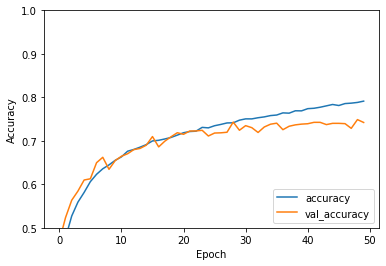

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test_en, verbose=2)
print(test_acc)

In [18]:
model.save("model.h5")